In [1]:
def covariance(X, Y, sample=True):
    n = len(X)
    x_mean = sum(X) / n
    y_mean = sum(Y) / n
    s = sum((X[i] - x_mean) * (Y[i] - y_mean) for i in range(n))
    return s / (n - 1 if sample else n)

In [2]:
def variance(X, sample=True):
    n = len(X)
    mean = sum(X) / n
    s = sum((x - mean) ** 2 for x in X)
    return s / (n - 1 if sample else n)

In [3]:
def correlation(X, Y):
    return covariance(X, Y) / (variance(X) * variance(Y)) ** 0.5

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
df_tips = sns.load_dataset("tips")
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
df_tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


freq показывает частоту top значения

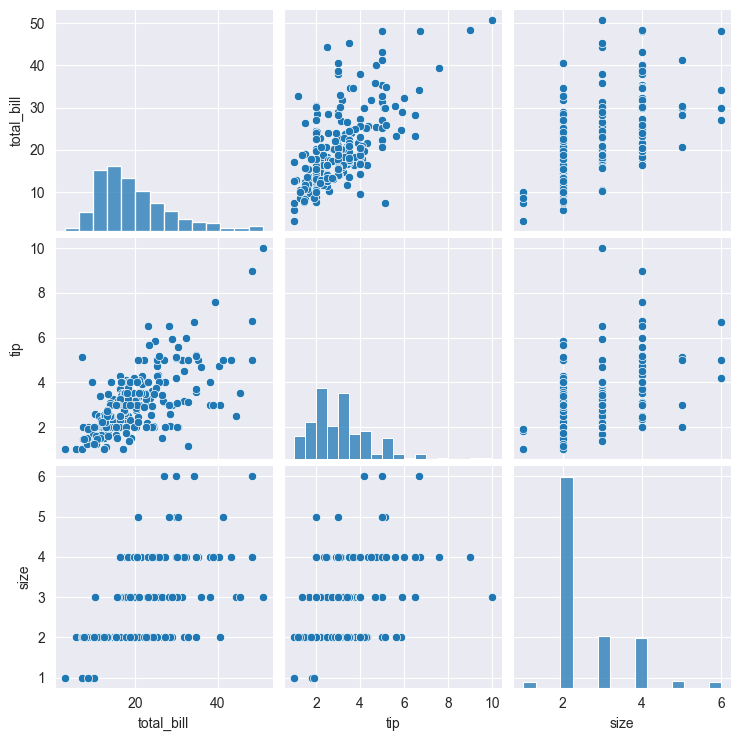

In [10]:
sns.pairplot(df_tips)

<Axes: xlabel='sex', ylabel='count'>

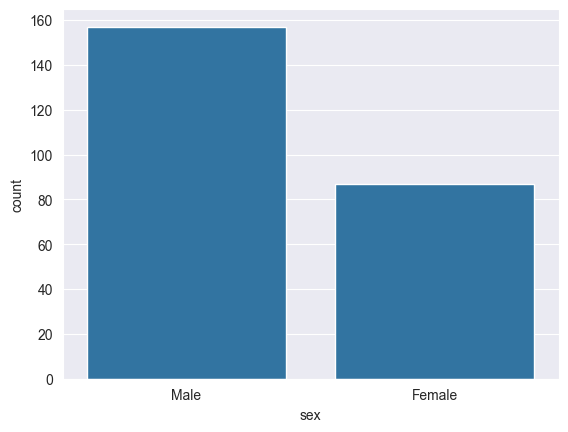

In [11]:
data = df_tips['sex'].value_counts()
sns.barplot(x=data.index, y=data)
# sns.countplot(x='sex', data=df_tips)

<Axes: xlabel='day', ylabel='count'>

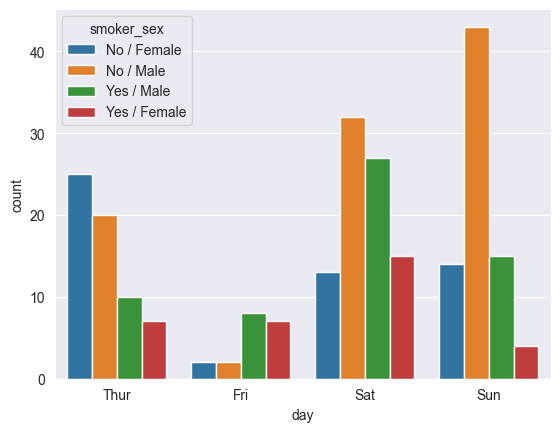

In [12]:
df_tips['smoker_sex'] = df_tips['smoker'].astype(str) + " / " + df_tips['sex'].astype(str)
sns.countplot(x='day', hue='smoker_sex', data=df_tips)

In [13]:
df_tips.groupby('day', observed=True)[['total_bill', 'tip']].sum()

,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


another dataset

In [14]:
df_d = sns.load_dataset('diamonds')
df_d

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [15]:
df_d.duplicated().value_counts()

False    53794
True       146
Name: count, dtype: int64

In [16]:
df_d.drop_duplicates(inplace=True)

In [17]:
df_d.duplicated().value_counts()

False    53794
Name: count, dtype: int64

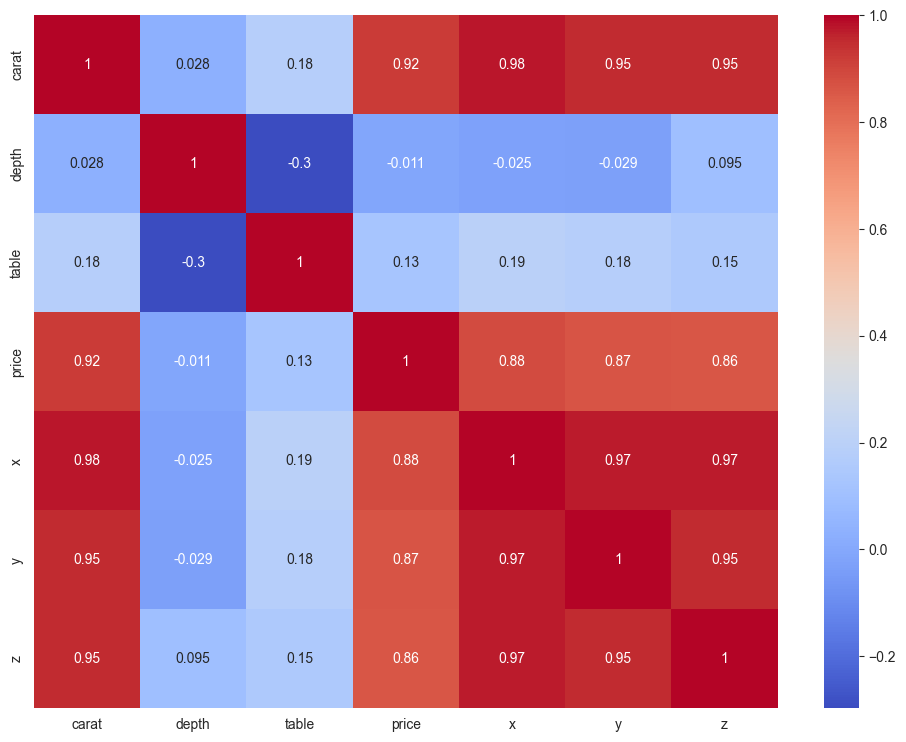

In [18]:
corr = df_d.corr(numeric_only=True)

plt.figure(figsize=(12, 9))  # ширина 12, высота 8 дюймов
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
